# Optimized Wind Turbine Reliability

## Matthew Lewis

Wind energy is a rapidly growing sector, important in the transition to sustainable energy sources.
Companies all over the world operate many different turbines across diverse geographical locations.
They are dedicated to maximizing the efficiency and performance of their turbines to ensure the
highest possible energy yield while minimizing operational costs and environmental impact. This
case study explores how optimization techniques can be used to enhance the performance of these
wind turbines. By integrating data analytics and innovative strategies, key areas for improvement
can be found.

My study is directed towards onshore wind turbines and how reliable their designs are. An optimized
design will ensure the turbines last as long as possible while maintaining effective power outputs.
Wind turbine reliability is critical for the efficient and cost-effective generation of renewable energy.

Conducting this case study involves multiple steps, such as reviewing data collection from other
sources, analysis on the structure of turbines, and a simulation incorporating different outside
factors. I will use the Monte Carlo method to project a number of wind speeds the turbine will
face, as well as different blade lengths to ensure the most reliable design.

There are a number of unique challenges that companies are faced with when constructing or
designing the optimal turbine. Various wind conditions make it difficult to maintain consistent
performance and required tailored optimization strategies for each site. The geographical diversity
of the turbine locations results in highly variable wind conditions. This makes it an important
choice as to where to set up the turbines to ensure proper speeds. Aging infrastructure is another
challenge that must be faced. Every turbine in its fleet will age and begin to show signs of wear
and tear. This introduces additional complexity in maintaining optimal performance and longevity
in the design. Additionally, cost efficiency is important so the manufacturer stays within its limited budget. This demands cost-effective solutions that provide a high return on investment without extensively going over the cap space.

13.596763538894244 3.8269785568178194


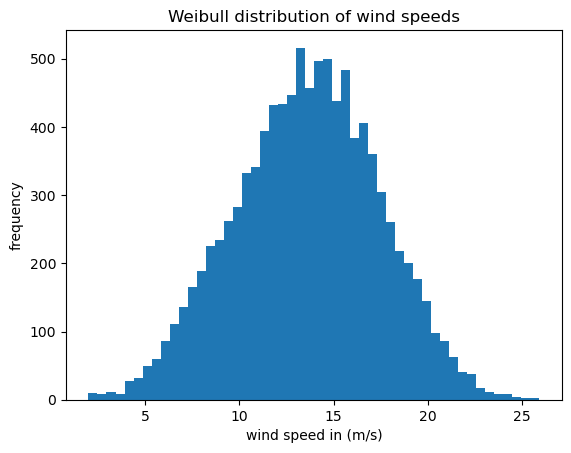

In [14]:
import numpy as np
import matplotlib.pyplot as plt
N_SIMULATIONS = 10000
BLADE_LENGTHS = np.linspace(30, 80, 50) #blade lengths in meters
# WIND_SPEEDS = np.linspace(4, 15, 25) #wind speeds in m/s
# Wind speed (m/s) 
k = 4 
lam = 15 
WIND_SPEEDS = np.random.weibull(k, N_SIMULATIONS) * lam 

plt.hist(WIND_SPEEDS, 50)
plt.title('Weibull distribution of wind speeds')
plt.xlabel('wind speed in (m/s)')
plt.ylabel('frequency')
print(WIND_SPEEDS.mean(), WIND_SPEEDS.std())

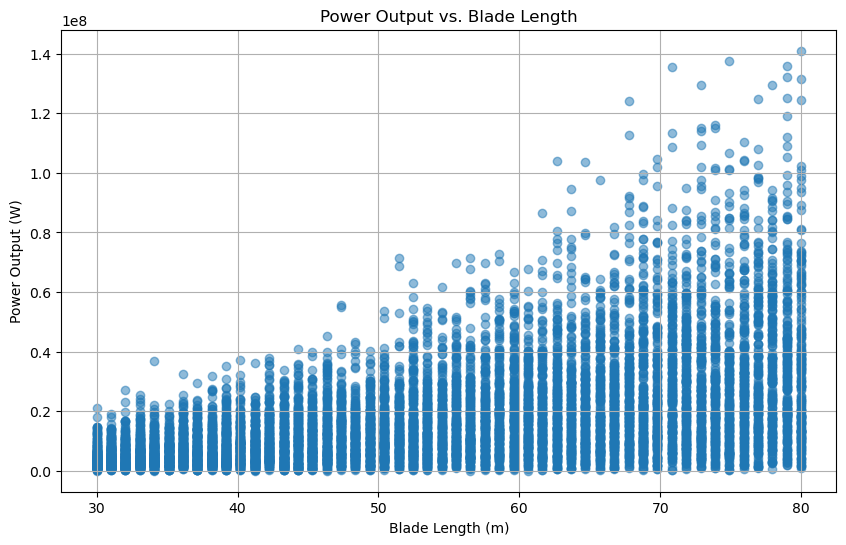

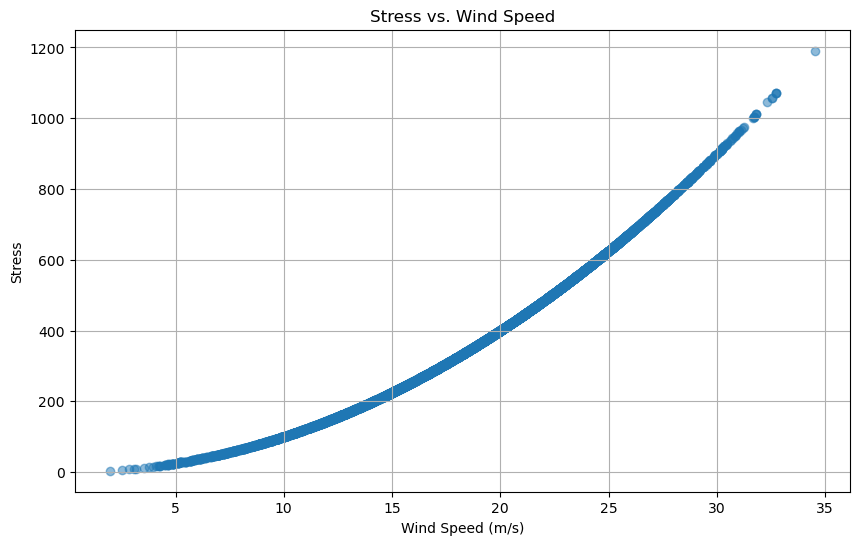

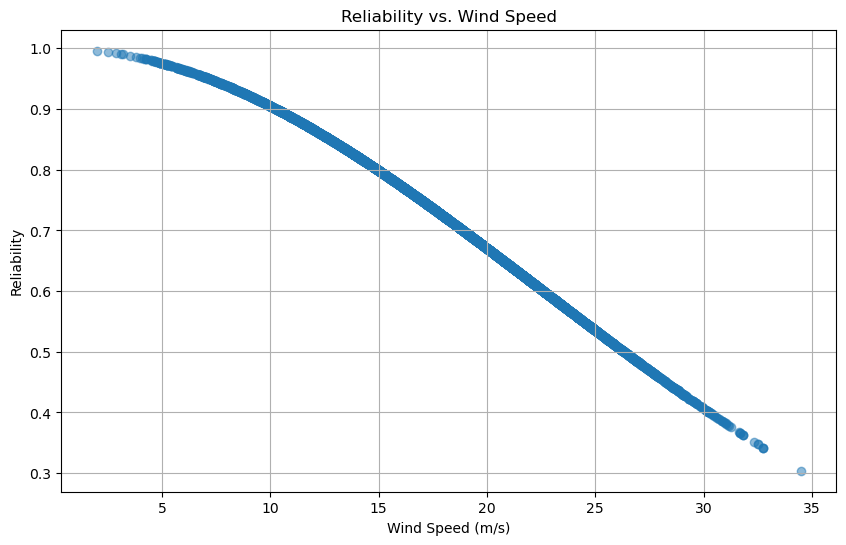

In [13]:
AIR_DENSITY = 1.225
#power output
def calculate_power(blade_length, wind_speed):
    swept_area = np.pi * (blade_length ** 2)
    power = 0.5 * AIR_DENSITY * swept_area * (wind_speed ** 3) * 0.4
    1
    return power
#stress and reliability
def calculate_stress_and_reliability(blade_length, wind_speed):
    torque = blade_length * wind_speed ** 2 #simplified torque calculation
    stress = torque / blade_length
    reliability = np.exp(-stress / 1000) #simplified reliability model
    return stress, reliability
#monte carlo
results = []
for _ in range(N_SIMULATIONS):
    blade_length = np.random.choice(BLADE_LENGTHS)
    wind_speed = np.random.choice(WIND_SPEEDS)
    power = calculate_power(blade_length, wind_speed)
    stress, reliability = calculate_stress_and_reliability(blade_length,wind_speed)
    results.append((blade_length, wind_speed, power, stress, reliability))
results = np.array(results)
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 0], results[:, 2], alpha=0.5)
plt.title('Power Output vs. Blade Length')
plt.xlabel('Blade Length (m)')
plt.ylabel('Power Output (W)')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 1], results[:, 3], alpha=0.5)
plt.title('Stress vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Stress')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.scatter(results[:, 1], results[:, 4], alpha=0.5)
plt.title('Reliability vs. Wind Speed')
plt.xlabel('Wind Speed (m/s)')
plt.ylabel('Reliability')
plt.grid(True)
plt.show()

The Monte Carlo simulation evaluates the performance and reliability of wind turbines with varying blade lengths and wind speeds. The code sets up a simulation framework with 10,000 iterations. Blade lengths range from 30 to 80 meters, and wind speeds range from 4 to 15 meters per second. The air density is assumed to be 1.225 kg/m³, the standard at sea level. 
Two main functions are defined: 
- `calculate_power` and
- `calculate_stress_and_reliability`.

The `calculate_power` function computes the power output of a wind turbine using the blade length and wind speed, considering the swept area of the blades and incorporating a power coefficient of 0.4. The `calculate_stress_and_reliability` function calculates the stress on the blades and the reliability of the turbine. The torque is simplified as being proportional to the product of blade length and the square of wind speed, while stress is the torque divided by blade length. Reliability is modeled as an exponential decay function of stress.

Three scatter plots are generated to visualize the relationships between key variables: power output
versus blade length, stress versus wind speed, and reliability versus wind speed. These plots provide
insights into how different configurations of blade length and wind speed impact the turbine’s
performance and reliability, aiding in the optimization of wind turbine design and operation.

The code uses estimated wind speeds that would be expected for onshore turbines to face. It also
uses a wide range of lengths for the turbine which show how the blade lengths effects the power
output. The larger the blade length, the more power that is outputted. For the wind speeds, the
graphs project how much stress and reliablity change as the speed increases. Higher speeds mean
the stress is greater on the blades and therefore becomes less reliable. These factors can be used
to choose the right sized blade for the longest life expectancy that the manufacturers are looking
for. Based on the costs needed to produce the blades as well, the manufacturers have to decide on
an optimal size that can withstand the wind speeds in the selected location

This case study demonstrates the significant advancements and optimizations achieved through an
innovative approach to wind turbine performance and reliability. By leveraging data analytics and
simulation techniques, it has provided solutions that can lead to improvements in energy yield, cost
efficiency, and operational reliability.
## Sources:
https://wes.copernicus.org/articles/5/171/2020/
https://www.mdpi.com/1996-1073/10/12/2099

_I used both these sources to compare onshore and offshore turbines in order to see the differences between the two. I used  information on the onshore turbines as a basis for the study and understanding more about reliability. I did additional research on numbers such as wind speeds and blade lengths to make a more accurate model._